In [246]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Importing Useful Libraries

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Importing Data

In [248]:
train_df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

# Gathering useful information about the data

In [249]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [250]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [251]:
train_df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [252]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Removing the null values

In [253]:
null_cols=train_df.columns[train_df.isna().any()]
train_df[null_cols].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [254]:
drop_cols=['PoolQC', 'Fence', 'MiscFeature']
train_df=train_df.drop(drop_cols,axis=1)
test_df=test_df.drop(drop_cols,axis=1)

In [255]:
train_df[train_df.columns[train_df.isna().any()]].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [256]:
num_impute=["LotFrontage","MasVnrArea","GarageYrBlt"]

mean_imputer=SimpleImputer(strategy="mean")

train_df[num_impute]=pd.DataFrame(mean_imputer.fit_transform(train_df[num_impute]),columns=num_impute,index=train_df.index)

test_df[num_impute]=pd.DataFrame(mean_imputer.transform(test_df[num_impute]),columns=num_impute,index=test_df.index)

In [257]:
mode_impute=train_df.isnull().sum()
mode_impute=mode_impute[mode_impute>0].index
mode_impute

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [258]:
mode_imputer=SimpleImputer(strategy="most_frequent")

train_df[mode_impute]=pd.DataFrame(mode_imputer.fit_transform(train_df[mode_impute]),columns=mode_impute,index=train_df.index)
test_df[mode_impute]=pd.DataFrame(mode_imputer.transform(test_df[mode_impute]),columns=mode_impute,index=test_df.index)

In [259]:
train_df.isnull().sum().sum()

0

In [260]:
test_df.isnull().sum().sum()

0

# Identifying Outliers

In [262]:
fstq=train_df['SalePrice'].quantile(0.25)
trdq=train_df['SalePrice'].quantile(0.75)

iqr=trdq-fstq

lb=fstq-1.5*iqr
ub=trdq+1.5*iqr

<Axes: ylabel='SalePrice'>

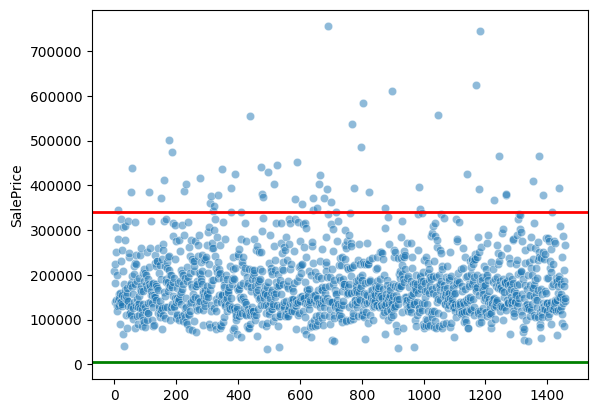

In [263]:
plt.axhline(y=lb,color="green",linewidth=2)
plt.axhline(y=ub,color="red",linewidth=2)
sns.scatterplot(train_df["SalePrice"],alpha=0.5)

# Handling Outliers

In [264]:
lower_array=np.where(train_df['SalePrice']<=lb)[0]
upper_array=np.where(train_df['SalePrice']>=ub)[0]

In [265]:
train_df.drop(index=lower_array,inplace=True)
train_df.drop(index=upper_array,inplace=True)

<Axes: ylabel='SalePrice'>

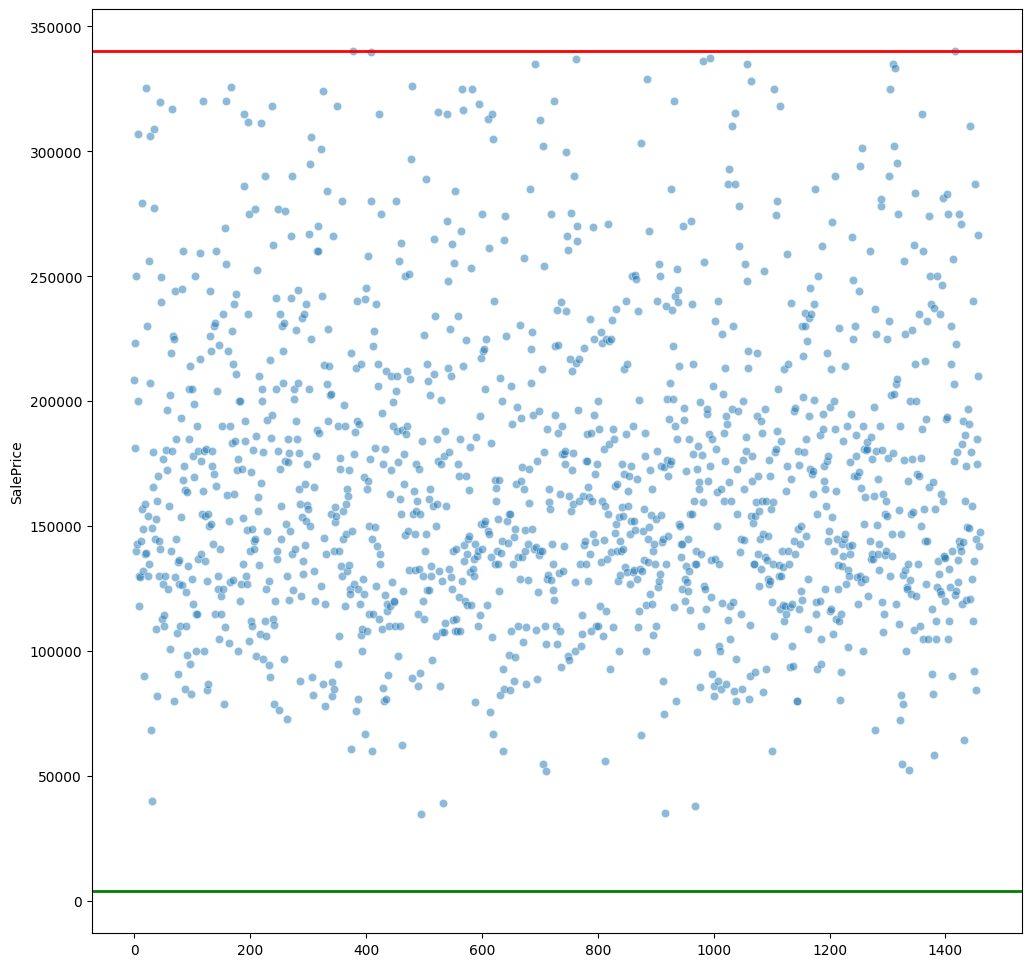

In [266]:
plt.figure(figsize=(12,12))
plt.axhline(y=lb,color="green",linewidth=2)
plt.axhline(y=ub,color="red",linewidth=2)
sns.scatterplot(train_df["SalePrice"],alpha=0.5)

# Visualizing the relationship between the numerical variables and the target variable

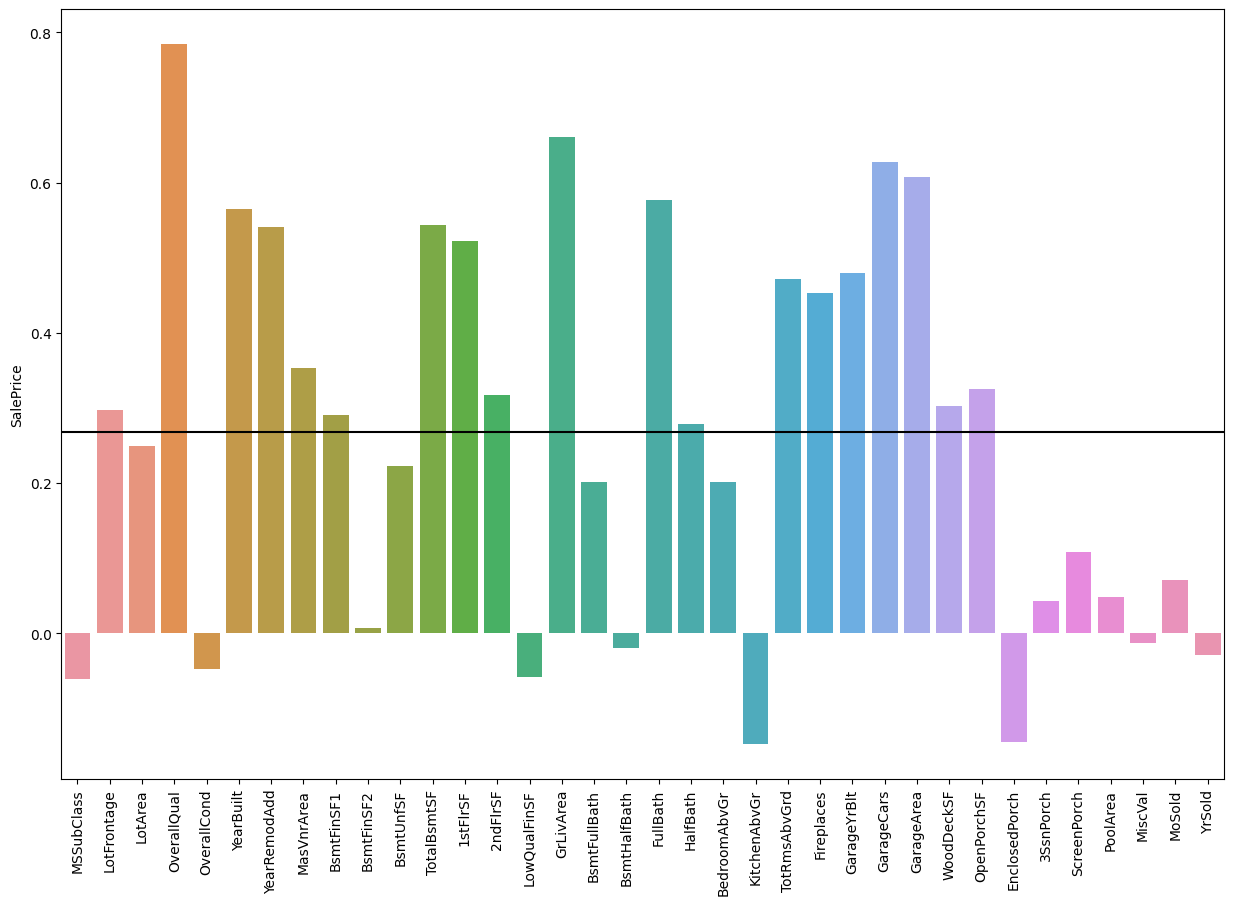

In [268]:
dc=['Id','SalePrice']
plt.figure(figsize=(15,10))
plt.ylabel("Correlation_Values")
corr=pd.DataFrame(train_df[numcols].corr()['SalePrice'].drop(dc))
corr_mean=corr.mean()
corr_mean=corr_mean.values[0]
sns.barplot(data=corr,y=corr['SalePrice'],x=corr.index)
plt.axhline(y=corr_mean,color="black")
x=plt.xticks(rotation=90)

# Transforming the categorical variables

In [267]:
objcols=train_df.select_dtypes(include="object").columns
numcols=[]
for i in train_df.columns:
    if i not in objcols:
        numcols.append(i)

In [269]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder()
oh_encoder=OneHotEncoder(sparse_output=False)

In [270]:
oh_df=pd.DataFrame(oh_encoder.fit_transform(train_df[oh_cols]),columns=oh_encoder.get_feature_names_out(),index=train_df.index)
oht_df=pd.DataFrame(oh_encoder.transform(test_df[oh_cols]),columns=oh_encoder.get_feature_names_out(),index=test_df.index)
train_df=train_df.join(oh_df)
test_df=test_df.join(oht_df)
train_df.drop(oh_cols,axis=1,inplace=True)
test_df.drop(oh_cols,axis=1,inplace=True)

train_df[ord_cols]=pd.DataFrame(ord_encoder.fit_transform(train_df[ord_cols]),columns=ord_cols,index=train_df.index)
test_df[ord_cols]=pd.DataFrame(ord_encoder.transform(test_df[ord_cols]),columns=ord_cols,index=test_df.index)

# Finding correlation between features and ranking them on the basis of their absolute value

In [271]:
correlation=(train_df.corr()['SalePrice'])
correlation=correlation.sort_values(key=abs,ascending=False)
print(correlation)

SalePrice           1.000000
OverallQual         0.784294
GrLivArea           0.661325
GarageCars          0.628013
GarageArea          0.607230
                      ...   
Alley              -0.006563
Condition2_PosN     0.006556
Foundation_Stone   -0.004742
RoofMatl_ClyTile   -0.004624
RoofMatl_Metal      0.004410
Name: SalePrice, Length: 209, dtype: float64


# Visualizing the Target Variable

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


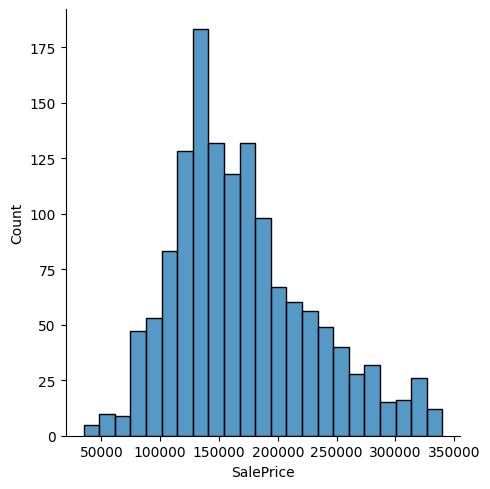

In [273]:
sns.displot(train_df['SalePrice'])